This notebook takes the US Linear Relative Sea Level Tends from https://tidesandcurrents.noaa.gov/sltrends/mslUSTrendsTable.html 
The station name column is separated into two parts named station and location.  Focusing on making sure we can analyze based on locations.  

In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from datetime import datetime

In [18]:
stations = pd.read_csv('data/USStationsLinearSeaLevelTrends.csv')

#Decided not to convert to datetime format
# Convert datetime format
#stations['First Year'] = pd.to_datetime(stations['First Year'], format='%Y')
#stations['Last Year'] = pd.to_datetime(stations['Last Year'], format='%Y')
       
print(stations.head(5))

   Station ID    Station Name  First Year  Last Year  Year Range  \
0     1611400  Nawiliwili, HI        1955       2023          69   
1     1612340    Honolulu, HI        1905       2023         119   
2     1612480    Mokuoloe, HI        1957       2023          67   
3     1615680     Kahului, HI        1947       2023          77   
4     1617433    Kawaihae, HI        1988       2023          36   

   Percent Complete  MSL Trends mm per yr  plus minus CI mm yr   \
0               100                  1.79                  0.39   
1               100                  1.54                  0.20   
2                84                  1.66                  0.49   
3                96                  2.21                  0.37   
4                92                  3.55                  1.05   

   MSL Trend ft per century  95 CI ft century  Latitude  Longitude  
0                      0.59              0.13   21.9544  -159.3561  
1                      0.51              0.07   21

In [19]:
print(stations.columns)

Index(['Station ID', 'Station Name', 'First Year', 'Last Year', 'Year Range',
       'Percent Complete', 'MSL Trends mm per yr', 'plus minus CI mm yr ',
       'MSL Trend ft per century', '95 CI ft century', 'Latitude',
       'Longitude'],
      dtype='object')


In [20]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Station ID                145 non-null    int64  
 1   Station Name              145 non-null    object 
 2   First Year                145 non-null    int64  
 3   Last Year                 145 non-null    int64  
 4   Year Range                145 non-null    int64  
 5   Percent Complete          145 non-null    int64  
 6   MSL Trends mm per yr      145 non-null    float64
 7   plus minus CI mm yr       145 non-null    float64
 8   MSL Trend ft per century  145 non-null    float64
 9   95 CI ft century          145 non-null    float64
 10  Latitude                  145 non-null    float64
 11  Longitude                 145 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 13.7+ KB


In [21]:
# Ensuring every row has at least one comma (example: filling in a default state)
stations['Station Name'] = stations['Station Name'].apply(lambda x: x if ',' in x else x + ', Unknown')
print(stations)

     Station ID          Station Name  First Year  Last Year  Year Range  \
0       1611400        Nawiliwili, HI        1955       2023          69   
1       1612340          Honolulu, HI        1905       2023         119   
2       1612480          Mokuoloe, HI        1957       2023          67   
3       1615680           Kahului, HI        1947       2023          77   
4       1617433          Kawaihae, HI        1988       2023          36   
..          ...                   ...         ...        ...         ...   
140     9497645       Prudhoe Bay, AK        1988       2023          36   
141     9751401     Lime Tree Bay, VI        1977       2023          47   
142     9751639  Charlotte Amalie, VI        1975       2023          49   
143     9755371          San Juan, PR        1962       2023          62   
144     9759110   Magueyes Island, PR        1955       2023          69   

     Percent Complete  MSL Trends mm per yr  plus minus CI mm yr   \
0                 

In [22]:
split_columns = stations['Station Name'].str.split(',', n=1, expand=True)

# Check if the split resulted in one or two columns and handle accordingly
if len(split_columns.columns) == 1:
    # Only one column means no commas were found; you can choose how to handle this.
    # For example, assign the entire value to 'City' and set 'State' as None.
    stations['City'] = split_columns[0]
    stations['State'] = None
else:
    # Assign the split columns to 'City' and 'State'
    stations['City'], stations['State'] = split_columns[0], split_columns[1]

# Optionally, handle missing or cleanup tasks here (e.g., strip whitespace)
stations['City'] = stations['City'].str.strip()
stations['State'] = stations['State'].str.strip()

print(stations)

     Station ID          Station Name  First Year  Last Year  Year Range  \
0       1611400        Nawiliwili, HI        1955       2023          69   
1       1612340          Honolulu, HI        1905       2023         119   
2       1612480          Mokuoloe, HI        1957       2023          67   
3       1615680           Kahului, HI        1947       2023          77   
4       1617433          Kawaihae, HI        1988       2023          36   
..          ...                   ...         ...        ...         ...   
140     9497645       Prudhoe Bay, AK        1988       2023          36   
141     9751401     Lime Tree Bay, VI        1977       2023          47   
142     9751639  Charlotte Amalie, VI        1975       2023          49   
143     9755371          San Juan, PR        1962       2023          62   
144     9759110   Magueyes Island, PR        1955       2023          69   

     Percent Complete  MSL Trends mm per yr  plus minus CI mm yr   \
0                 

In [23]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Station ID                145 non-null    int64  
 1   Station Name              145 non-null    object 
 2   First Year                145 non-null    int64  
 3   Last Year                 145 non-null    int64  
 4   Year Range                145 non-null    int64  
 5   Percent Complete          145 non-null    int64  
 6   MSL Trends mm per yr      145 non-null    float64
 7   plus minus CI mm yr       145 non-null    float64
 8   MSL Trend ft per century  145 non-null    float64
 9   95 CI ft century          145 non-null    float64
 10  Latitude                  145 non-null    float64
 11  Longitude                 145 non-null    float64
 12  City                      145 non-null    object 
 13  State                     145 non-null    object 
dtypes: float64

In [24]:
stations.describe()

,Station ID,First Year,Last Year,Year Range,Percent Complete,MSL Trends mm per yr,plus minus CI mm yr,MSL Trend ft per century,95 CI ft century,Latitude,Longitude
count,1.450000e+02,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,8.306193e+06,1952.565517,2022.606897,70.917241,89.937931,2.363724,0.542621,0.775655,0.177862,36.943835,-95.736030
std,2.080343e+06,26.358852,1.980097,26.565564,13.516050,4.033597,0.415129,1.323432,0.135985,12.092958,48.340606
min,1.611400e+06,1856.000000,2009.000000,30.000000,42.000000,-18.040000,0.090000,-5.920000,0.030000,-14.280000,-177.360000
25%,8.570283e+06,1932.000000,2023.000000,51.000000,88.000000,1.830000,0.240000,0.600000,0.080000,29.357500,-123.440000
50%,8.726724e+06,1957.000000,2023.000000,66.000000,96.000000,2.940000,0.450000,0.960000,0.150000,37.506800,-85.878600
75%,9.416841e+06,1973.000000,2023.000000,91.000000,99.000000,4.210000,0.690000,1.380000,0.230000,42.353900,-75.810000
max,9.759110e+06,1994.000000,2023.000000,168.000000,100.000000,12.930000,3.140000,4.240000,1.030000,70.411400,167.736100


In [25]:
avg_by_state = stations.groupby('State')['MSL Trends mm per yr'].mean()
avg_by_state = avg_by_state.reset_index()
print(avg_by_state)

               State  MSL Trends mm per yr
0                 AK             -4.844444
1                 AL              4.630000
2     American Samoa              2.480000
3            Bermuda              2.215000
4                 CA              1.726667
5                 CT              3.100000
6                 DC              3.490000
7                 DE              3.800000
8                 FL              3.768333
9                 GA              3.610000
10              Guam              4.530000
11                HI              2.310000
12                LA              7.660000
13                MA              3.340000
14                MD              4.097143
15                ME              2.228000
16                MS              4.700000
17  Marshall Islands              2.060000
18                NC              4.180000
19                NH              2.040000
20                NJ              4.476667
21                NY              3.432500
22         

In [26]:
from categorizeregion import add_region_column

stations = add_region_column(stations)
print(stations)

stations.to_excel('data/usstations.xlsx', index=False)

     Station ID          Station Name  First Year  Last Year  Year Range  \
0       1611400        Nawiliwili, HI        1955       2023          69   
1       1612340          Honolulu, HI        1905       2023         119   
2       1612480          Mokuoloe, HI        1957       2023          67   
3       1615680           Kahului, HI        1947       2023          77   
4       1617433          Kawaihae, HI        1988       2023          36   
..          ...                   ...         ...        ...         ...   
140     9497645       Prudhoe Bay, AK        1988       2023          36   
141     9751401     Lime Tree Bay, VI        1977       2023          47   
142     9751639  Charlotte Amalie, VI        1975       2023          49   
143     9755371          San Juan, PR        1962       2023          62   
144     9759110   Magueyes Island, PR        1955       2023          69   

     Percent Complete  MSL Trends mm per yr  plus minus CI mm yr   \
0                 

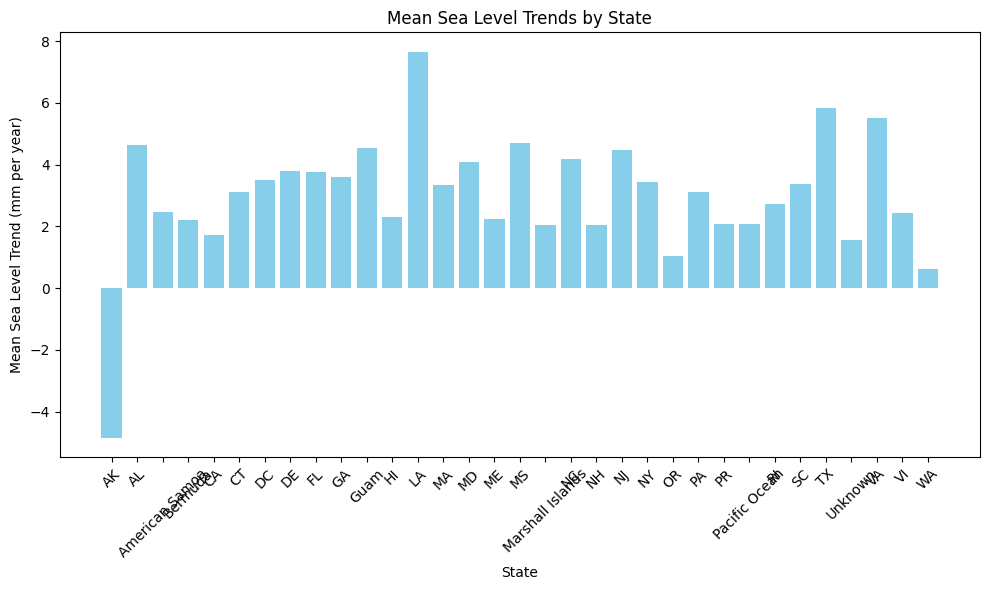

In [27]:
# Create a bar chart
plt.figure(figsize=(10, 6))  
plt.bar(avg_by_state['State'], avg_by_state['MSL Trends mm per yr'], color='skyblue')
plt.xlabel('State')  
plt.ylabel('Mean Sea Level Trend (mm per year)') 
plt.title('Mean Sea Level Trends by State')  
plt.xticks(rotation=45)  # Rotate state names for better visibility
plt.tight_layout()  # Adjust the layout to make sure everything fits without overlapping

# Show the plot
plt.show()

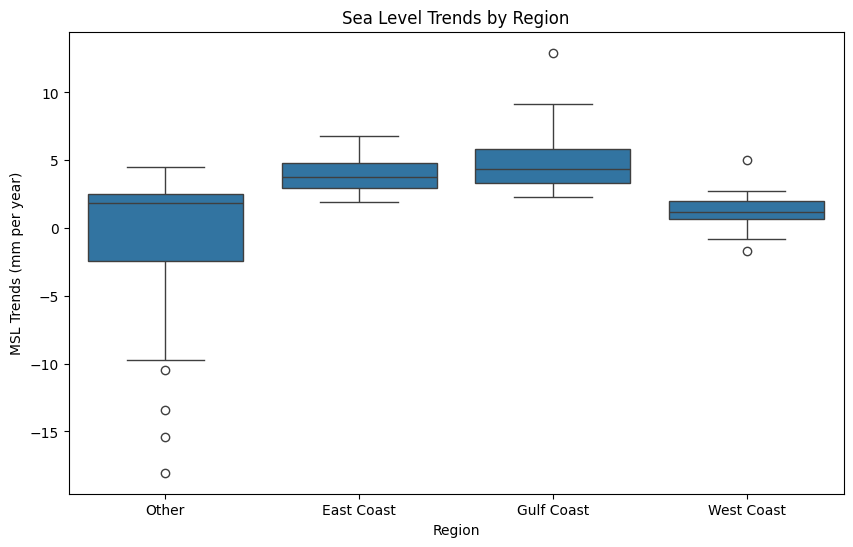

In [28]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='MSL Trends mm per yr', data=stations)

plt.title('Sea Level Trends by Region')
plt.xlabel('Region')
plt.ylabel('MSL Trends (mm per year)')

plt.savefig('sea_level_trends_gulf', dpi=300)

plt.show()

In [29]:
def calculate_overall_change(row):
   overall_change = row['Year Range'] * row['MSL Trends mm per yr']
   return overall_change

# Apply the function to each row of your DataFrame
stations['Overall Change mm'] = stations.apply(calculate_overall_change, axis=1)
print(stations)


     Station ID          Station Name  First Year  Last Year  Year Range  \
0       1611400        Nawiliwili, HI        1955       2023          69   
1       1612340          Honolulu, HI        1905       2023         119   
2       1612480          Mokuoloe, HI        1957       2023          67   
3       1615680           Kahului, HI        1947       2023          77   
4       1617433          Kawaihae, HI        1988       2023          36   
..          ...                   ...         ...        ...         ...   
140     9497645       Prudhoe Bay, AK        1988       2023          36   
141     9751401     Lime Tree Bay, VI        1977       2023          47   
142     9751639  Charlotte Amalie, VI        1975       2023          49   
143     9755371          San Juan, PR        1962       2023          62   
144     9759110   Magueyes Island, PR        1955       2023          69   

     Percent Complete  MSL Trends mm per yr  plus minus CI mm yr   \
0                 

In [30]:
# Group the DataFrame by 'Region' and calculate the mean 'Overall Change (mm)'
avg_change_by_region = stations.groupby('Region')['Overall Change mm'].mean().reset_index()

# Now, avg_change_by_region contains the average overall change for both 'Gulf Coast' and 'Other'
print(avg_change_by_region)


       Region  Overall Change mm
0  East Coast         284.141556
1  Gulf Coast         293.447222
2       Other         -63.053243
3  West Coast          91.059630
